# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

Direct Marketing: 1896
Number of attribues: 32
Classes total: 1657 - 239

Classes train: 1159 - 115
Classes test:  498 - 124


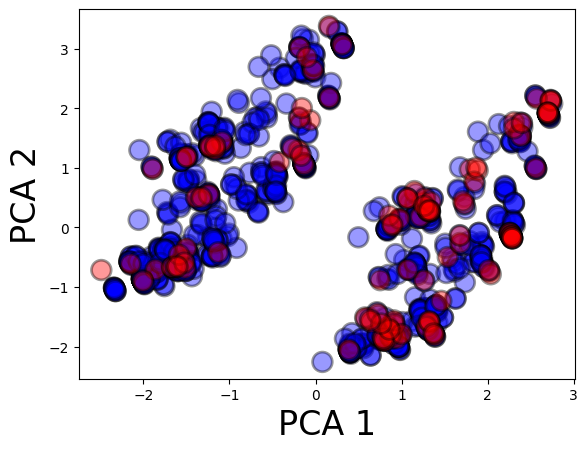

In [2]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[2]  # change ind to select dataset to use
model = 'MLP'

dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'MLP-deep'

dataset = datasets[12]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

Tuning SVM params with 5 fold CV
Best SVM params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Original


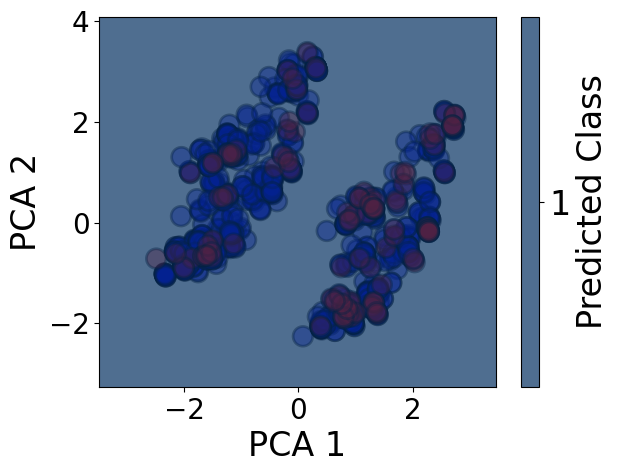

SMOTE


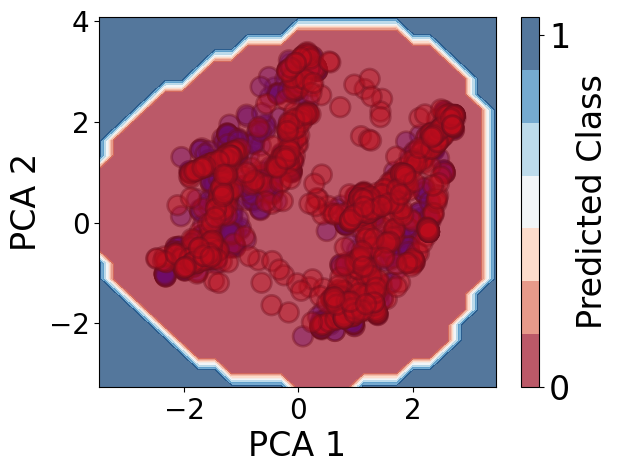

Balanced Weights


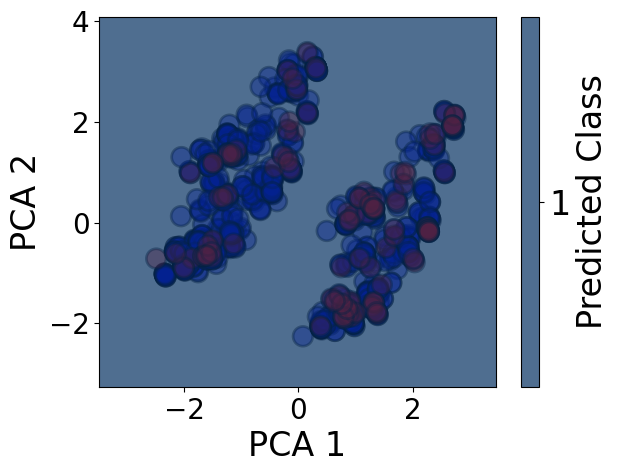

BMR


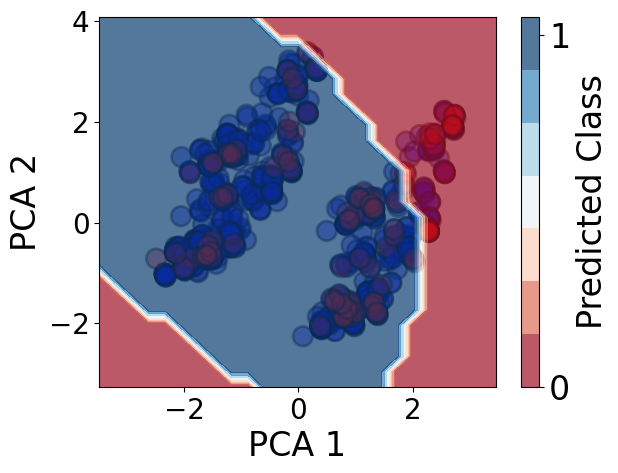

Threshold


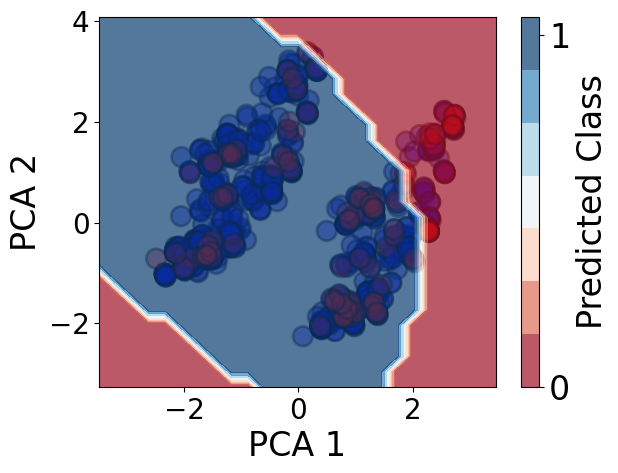

In [3]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Original']

## Fit deltas

Original Data


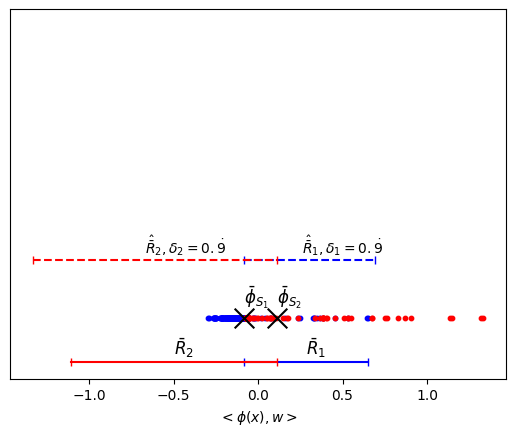

Unable to find result with downsample, increase the max_trials


In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [6]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Original          0.803859  0.127000  0.508065  0.031746
SMOTE             0.757235  0.408486  0.542541  0.233503
Balanced Weights  0.803859  0.127000  0.508065  0.031746
BMR               0.728296  0.545269  0.591090  0.347490
Threshold         0.728296  0.545269  0.591090  0.347490
Our Method        0.803859  0.127000  0.508065  0.031746 


Original


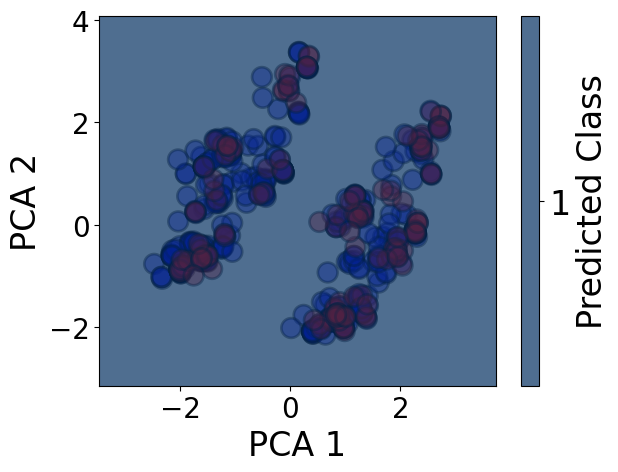

SMOTE


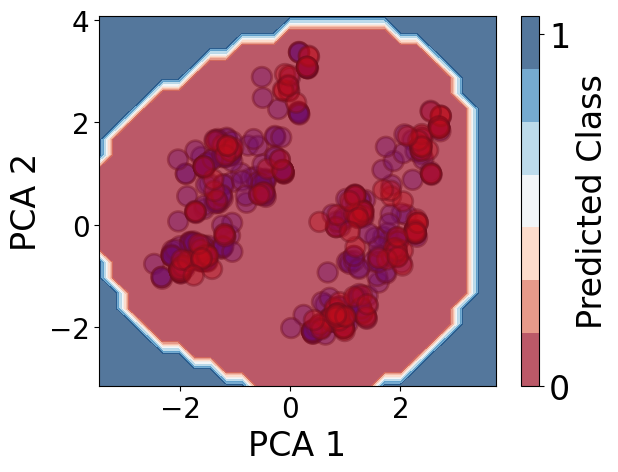

Balanced Weights


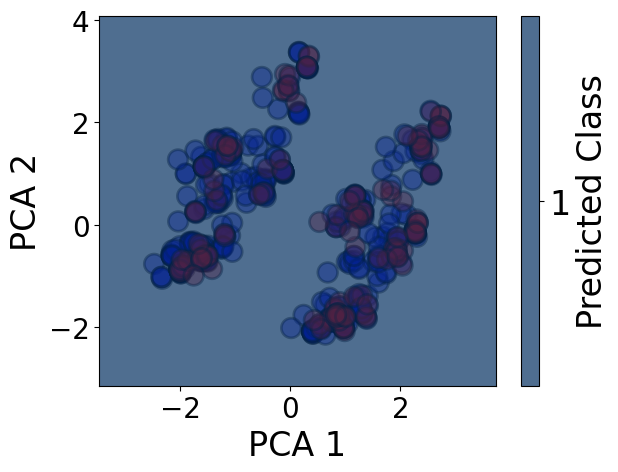

BMR


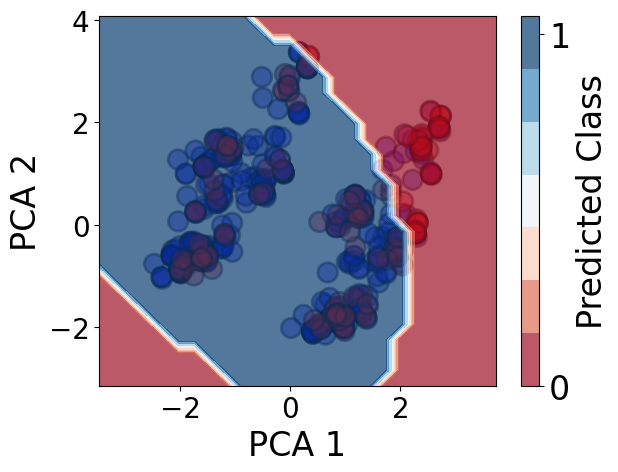

Threshold


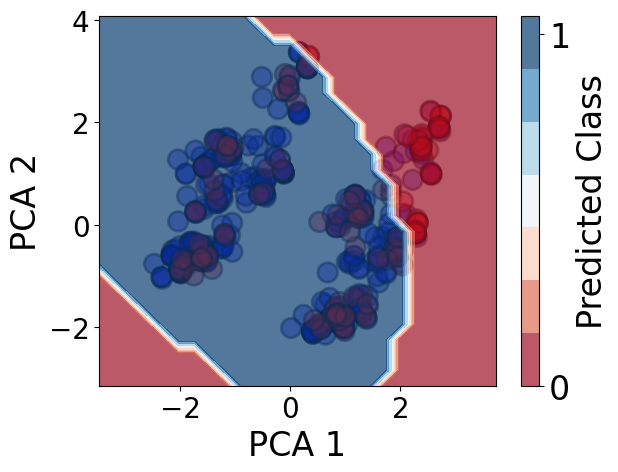

Our Method
Not fit to any data yet, call 'fit(X, y)' or  method first


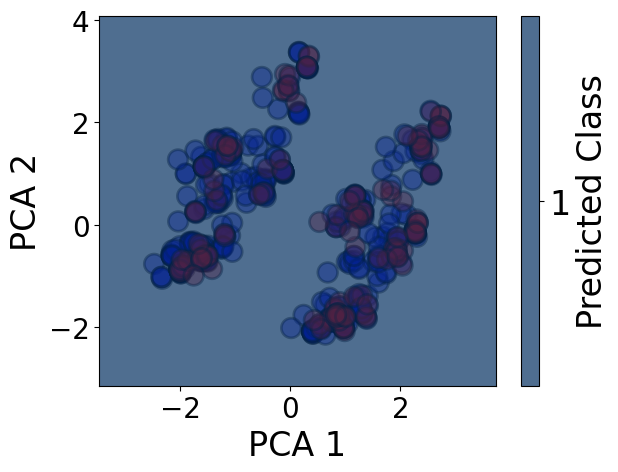

Giving bias from original classifier


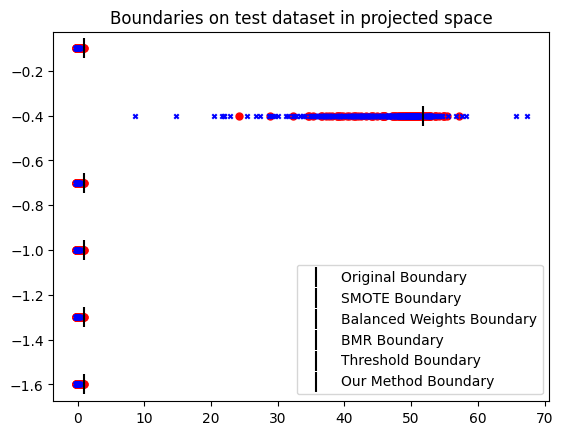

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.8039 & 0.1270 & 0.5081 & 0.0317 \\
SMOTE & 0.7572 & 0.4085 & 0.5425 & 0.2335 \\
Balanced Weights & 0.8039 & 0.1270 & 0.5081 & 0.0317 \\
BMR & 0.7283 & 0.5453 & 0.5911 & 0.3475 \\
Threshold & 0.7283 & 0.5453 & 0.5911 & 0.3475 \\
Our Method & 0.8039 & 0.1270 & 0.5081 & 0.0317 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.803859,0.127000,0.508065,0.031746
SMOTE,0.757235,0.408486,0.542541,0.233503
Balanced Weights,0.803859,0.127000,0.508065,0.031746
BMR,0.728296,0.545269,0.591090,0.347490
Threshold,0.728296,0.545269,0.591090,0.347490
Our Method,0.803859,0.127000,0.508065,0.031746


In [7]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])